## Get the data

Use the Jupyter file from the last lab (Customer Analysis Round 3)

In [1]:
import pandas as pd
import numpy as np
import data_cleaning_function as dc
data= pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [2]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#I start with my data cleaning process like the LAB before
data = dc.replace_column_lower(data,' ','_')

In [4]:
data.isna().sum()/data.shape[0]*100

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
data = dc.chance_object_to_datetime(data,'effective_to_date')

C:\Users\schue\IronHack\Bootcamp\Week_2\Day_2\Morning\lab-model-generation-and-validation\data_cleaning_function.py:91: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [7]:
for col in data.select_dtypes(object):   
    display(col,data[col].unique())

'customer'

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

'state'

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

'response'

array(['No', 'Yes'], dtype=object)

'coverage'

array(['Basic', 'Extended', 'Premium'], dtype=object)

'education'

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

'employmentstatus'

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

'gender'

array(['F', 'M'], dtype=object)

'location_code'

array(['Suburban', 'Rural', 'Urban'], dtype=object)

'marital_status'

array(['Married', 'Single', 'Divorced'], dtype=object)

'policy_type'

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

'policy'

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

'renew_offer_type'

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

'sales_channel'

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

'vehicle_class'

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

'vehicle_size'

array(['Medsize', 'Small', 'Large'], dtype=object)

# Complete the following task

### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [8]:
column_numerical = data.select_dtypes(np.number)
column_categorical = data.select_dtypes(object)

## Now we will try to check the normality of the numerical variables visually. Use seaborn library to construct distribution plots for the numerical variables Use Matplotlib to construct histograms Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

column_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

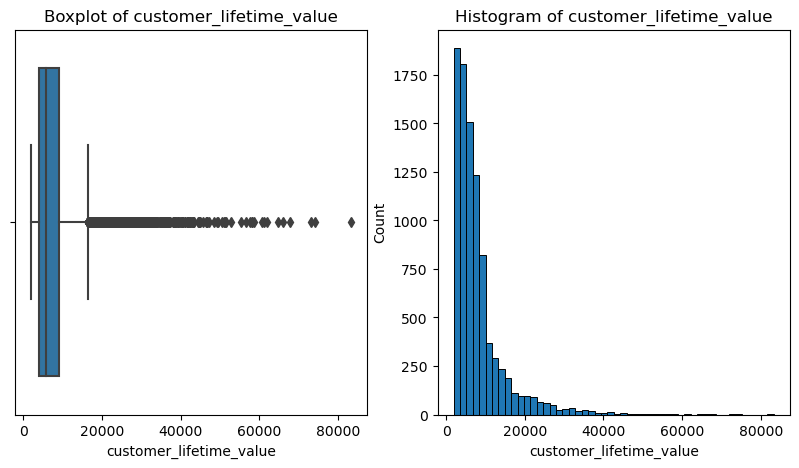

Skew: 3.0322802599299847


In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['customer_lifetime_value'], ax=ax[0])
ax[0].set_title("Boxplot of customer_lifetime_value")
ax[1].hist(x=data['customer_lifetime_value'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of customer_lifetime_value")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('customer_lifetime_value')
plt.show()
print('Skew:',data['customer_lifetime_value'].skew())

In [11]:
#The skew is above 2, so i woud appy a transformation.

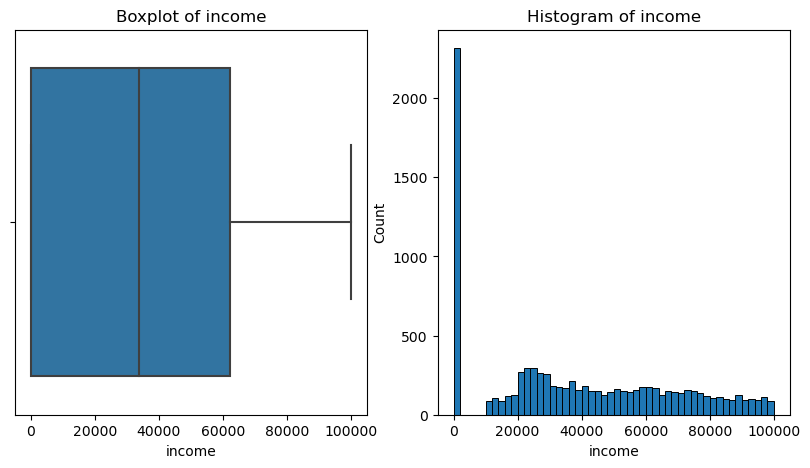

Skew: 0.28688727581189166


In [12]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['income'], ax=ax[0])
ax[0].set_title("Boxplot of income")
ax[1].hist(x=data['income'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of income")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('income')
plt.show()
print('Skew:',data['income'].skew())

In [13]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

In [14]:
#as in the Lab befor i will display the distribution of the income in two groups, 
#1. group with all customers
#2. group with customers with a income bigger then 0
data_income_bigger_0 = dc.drop_null(data,'income')

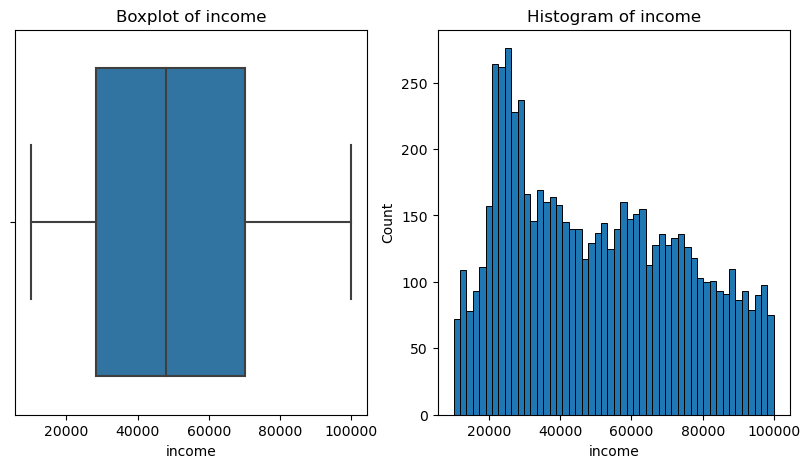

Skew: 0.28688727581189166


In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data_income_bigger_0['income'], ax=ax[0])
ax[0].set_title("Boxplot of income")
ax[1].hist(x=data_income_bigger_0['income'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of income")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('income')
plt.show()
print('Skew:',data['income'].skew())

In [16]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

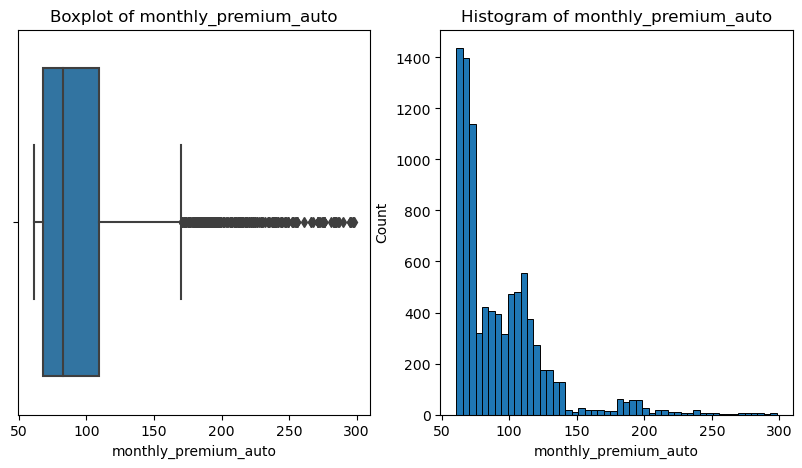

Skew: 2.1235464499475345


In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['monthly_premium_auto'], ax=ax[0])
ax[0].set_title("Boxplot of monthly_premium_auto")
ax[1].hist(x=data['monthly_premium_auto'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of monthly_premium_auto")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('monthly_premium_auto')
plt.show()
print('Skew:',data['monthly_premium_auto'].skew())

In [18]:
#The skew is above 2, so i woud appy a transformation.

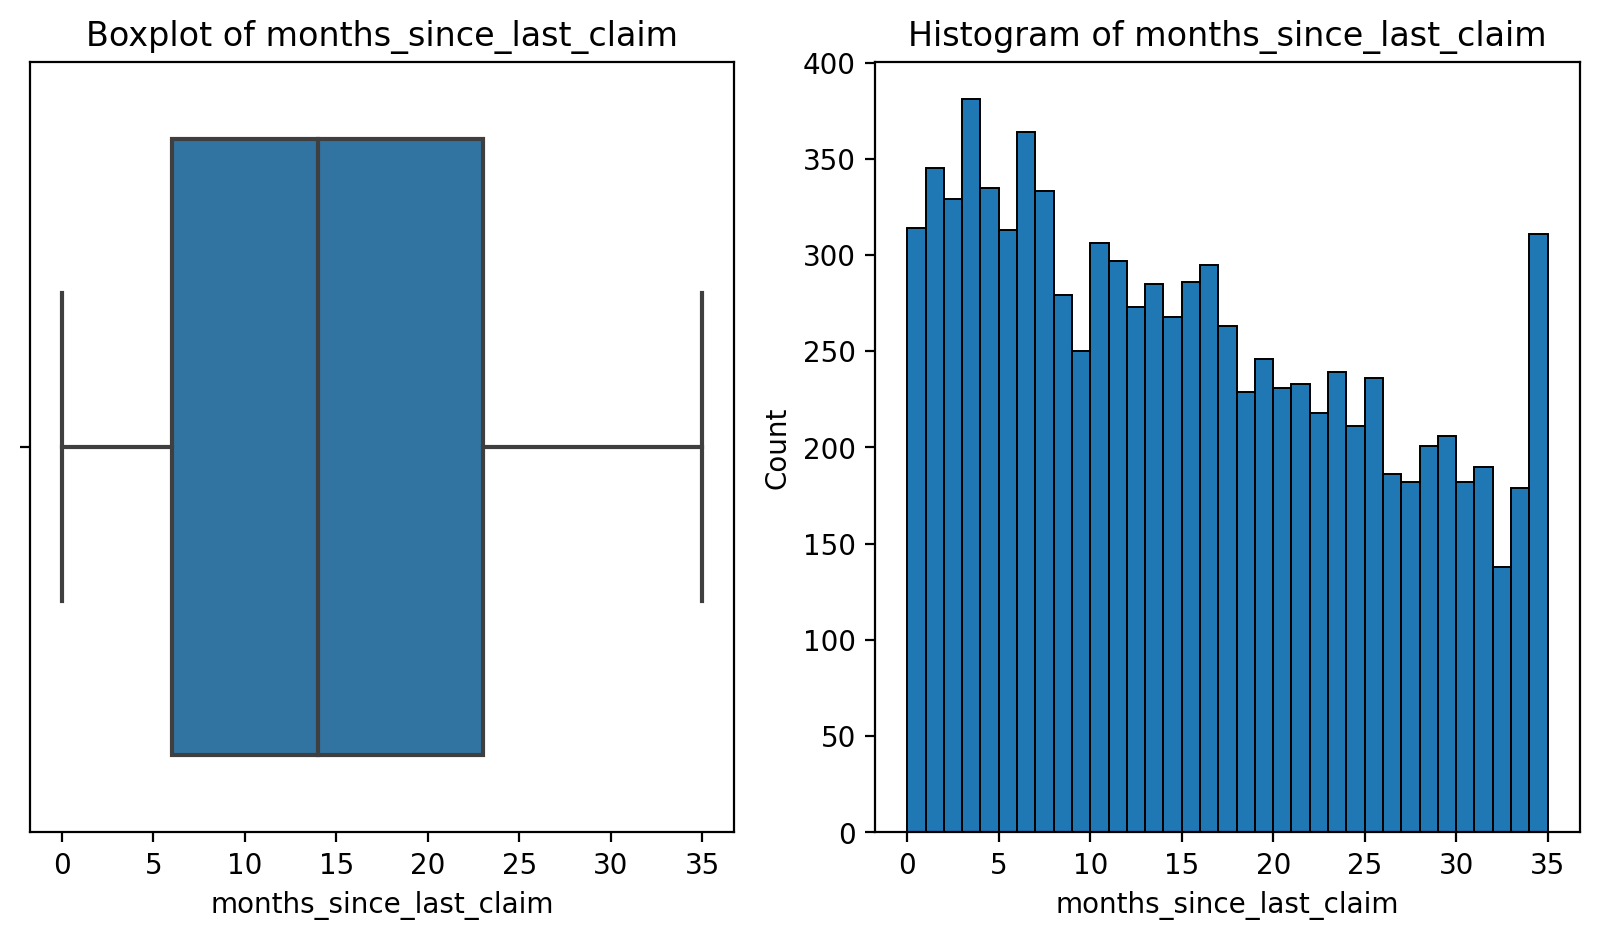

Skew: 0.2785863118107981


In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=200)
sns.boxplot(x=data['months_since_last_claim'], ax=ax[0])
ax[0].set_title("Boxplot of months_since_last_claim")
ax[1].hist(x=data['months_since_last_claim'], bins=35, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of months_since_last_claim")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('months_since_last_claim')
plt.show()
print('Skew:',data['months_since_last_claim'].skew())

In [20]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

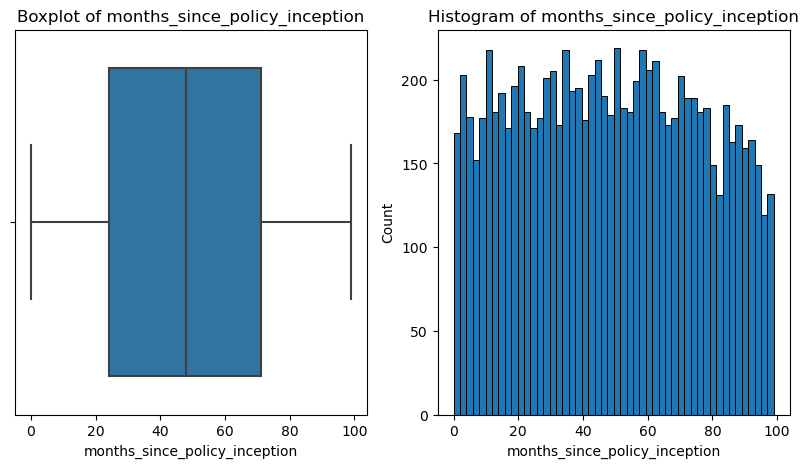

Skew: 0.040164961597799524


In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['months_since_policy_inception'], ax=ax[0])
ax[0].set_title("Boxplot of months_since_policy_inception")
ax[1].hist(x=data['months_since_policy_inception'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of months_since_policy_inception")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('months_since_policy_inception')
plt.show()
print('Skew:',data['months_since_policy_inception'].skew())

In [22]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

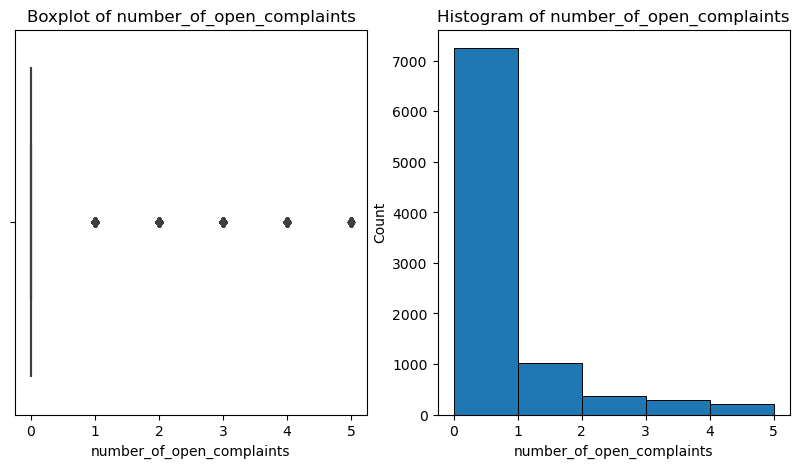

Skew: 2.783263052399567


In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['number_of_open_complaints'], ax=ax[0])
ax[0].set_title("Boxplot of number_of_open_complaints")
ax[1].hist(x=data['number_of_open_complaints'], bins=5, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of number_of_open_complaints")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('number_of_open_complaints')
plt.show()
print('Skew:',data['number_of_open_complaints'].skew())

In [24]:
#The skew is above 2, so i woud appy a transformation.

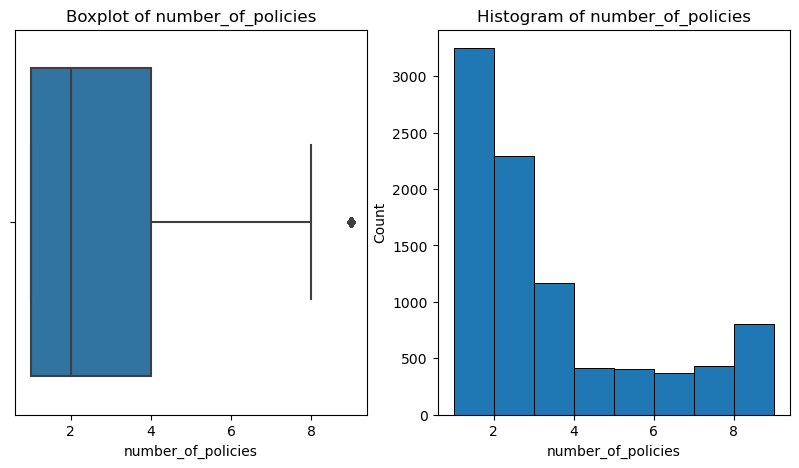

Skew: 1.2533327352739663


In [25]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['number_of_policies'], ax=ax[0])
ax[0].set_title("Boxplot of number_of_policies")
ax[1].hist(x=data['number_of_policies'], bins=8, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of number_of_policies")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('number_of_policies')
plt.show()
print('Skew:',data['number_of_policies'].skew())

In [26]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

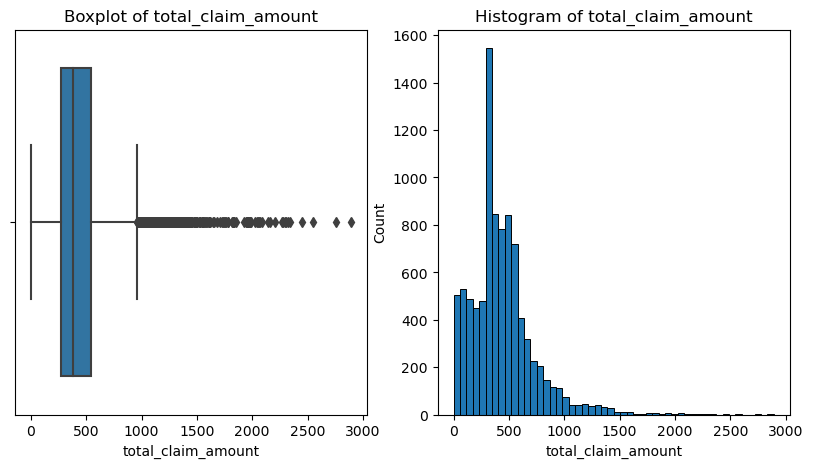

Skew: 1.7149658097209557


In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5), dpi=100)
sns.boxplot(x=data['total_claim_amount'], ax=ax[0])
ax[0].set_title("Boxplot of total_claim_amount")
ax[1].hist(x=data['total_claim_amount'], bins=50, linewidth=0.7, edgecolor='black')
ax[1].set_title("Histogram of total_claim_amount")
ax[1].set_ylabel('Count')
ax[1].set_xlabel('total_claim_amount')
plt.show()
print('Skew:',data['total_claim_amount'].skew())

In [28]:
#The skew is in the range of [-2,2], so i woudn't appy a transformation.

In [29]:
#sns.pairplot(data.select_dtypes(np.number))

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [30]:
def select_features_for_linear_models_based_on_correlation(df: pd.DataFrame, y: str, threshold=0.75) -> list:
    '''
    This function picks a DataFrame and a `y` column computes the correlation matrix between all the numerical
    columns. Then it returns a Python list with the columns that have a abs(corr(x,y)) >= 0.75

    Inputs:
    df: Pandas DataFrame
    y: string with the column to be considered `y`

    Outputs:
    list of columns highñy correlated with the `y` column
    '''

    df2 = df.copy()
    df2 = df2.select_dtypes([float,int])
    
    correlation_matrix = df2.corr()
    correlation_matrix.drop(y,axis=0, inplace=True)
    
    selected_columns = correlation_matrix[y]

    list_of_selected_columns = correlation_matrix[abs(selected_columns) >= threshold].index.tolist()
    

    return list_of_selected_columns

In [31]:
select_features_for_linear_models_based_on_correlation(column_numerical,'total_claim_amount',0.5)

['monthly_premium_auto']

In [32]:
correlations_matrix = column_numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


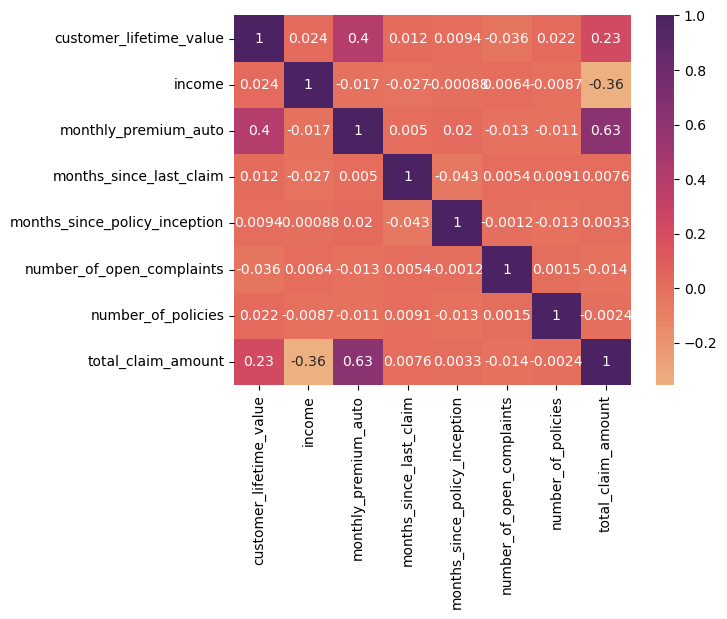

In [33]:
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

## If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column total_claim_amount. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.

In [34]:
#there are not columns with an correlation higher then 0.63. 

## Plot the heatmap of the correlation matrix after the filtering.

# Lab | Model generation and validation

### Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity (see the previous lab)

For the numerical columns i decide to just take the monthly_premium_auto column with a correlation of 0,63 all correlations are below 0,4.

We didn't check the correlations between the categorical columns yet. So i will do some plots with categorical colums vs total_claim_amount to decide which columns i will use to train the model. Lets have a lock at which categorical columns we have.

In [35]:
column_categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


I will drop the customer_id because its an identifyer and i dont assume any correlation.

In [36]:
#column_categorical = column_categorical.drop(['customer'],axis =1)
column_categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


I determine which categorical columns are nominal and which are ordinal by looking at there unique values

In [37]:
for col in column_categorical:   
    display(col,data[col].unique())

'customer'

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

'state'

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

'response'

array(['No', 'Yes'], dtype=object)

'coverage'

array(['Basic', 'Extended', 'Premium'], dtype=object)

'education'

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

'employmentstatus'

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

'gender'

array(['F', 'M'], dtype=object)

'location_code'

array(['Suburban', 'Rural', 'Urban'], dtype=object)

'marital_status'

array(['Married', 'Single', 'Divorced'], dtype=object)

'policy_type'

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

'policy'

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

'renew_offer_type'

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

'sales_channel'

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

'vehicle_class'

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

'vehicle_size'

array(['Medsize', 'Small', 'Large'], dtype=object)

Nominal: state, response, employmentstatus, gender, marital_status, policy_type, policy, renew_offer_type, sales_channel

Ordinal: coverage, education, location_code, vehicle_class, vehicle_size 

In [38]:
ordinal = column_categorical[['coverage', 'education', 'location_code', 'vehicle_class', 'vehicle_size']]
ordinal.head()

,coverage,education,location_code,vehicle_class,vehicle_size
0,Basic,Bachelor,Suburban,Two-Door Car,Medsize
1,Extended,Bachelor,Suburban,Four-Door Car,Medsize
2,Premium,Bachelor,Suburban,Two-Door Car,Medsize
3,Basic,Bachelor,Suburban,SUV,Medsize
4,Basic,Bachelor,Rural,Four-Door Car,Medsize


I renamme the values of the ordinal columns with numbers in a certan order.

In [39]:
def rename_ordinal(df:pd.DataFrame, col:str, ordinal_dict:dict) -> pd.DataFrame:
    '''
    ranaming a ordinal column with the values from an input dictionary
    '''
    df[col] = df[col].replace(ordinal_dict)
    return

In [40]:
#coverage 'Basic' 'Extended' 'Premium'
rename_ordinal(ordinal,'coverage',{"Basic": "1", "Extended": "2", "Premium": "3"})
#education ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']
rename_ordinal(ordinal,'education',{"Bachelor": "1", "College": "2", "Master": "3", "High School or Below": "4", "Doctor": "5"})
#location_code ['Suburban', 'Rural', 'Urban']
rename_ordinal(ordinal,'location_code',{"Rural": "1", "Suburban": "2", "Urban": "3"})
#vehicle_class ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car']
rename_ordinal(ordinal,'vehicle_class',{"Two-Door Car": "1", "Four-Door Car": "2", "SUV": "3", "Luxury SUV": "4", "Sports Car": "5", "Luxury Car": "5"})
#vehicle_size ['Medsize', 'Small', 'Large']
rename_ordinal(ordinal,'vehicle_size',{"Small": "1", "Medsize": "2", "Large": "3"})



C:\Users\schue\AppData\Local\Temp\ipykernel_15756\2843734578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(ordinal_dict)


In [41]:
ordinal.head()

,coverage,education,location_code,vehicle_class,vehicle_size
0,1,1,2,1,2
1,2,1,2,2,2
2,3,1,2,1,2
3,1,1,2,3,2
4,1,1,1,2,2


I concat the ordinal columns with the total claim amount to see any correlations between them

In [42]:
ordinal=pd.concat([ordinal, data['total_claim_amount']],axis=1)

In [43]:
ordinal.head()

,coverage,education,location_code,vehicle_class,vehicle_size,total_claim_amount
0,1,1,2,1,2,384.811147
1,2,1,2,2,2,1131.464935
2,3,1,2,1,2,566.472247
3,1,1,2,3,2,529.881344
4,1,1,1,2,2,138.130879


In [44]:
correlations_matrix = ordinal.corr()
correlations_matrix

,coverage,education,location_code,vehicle_class,vehicle_size,total_claim_amount
coverage,1.000000,0.022113,-0.020176,0.020491,0.003775,0.279078
education,0.022113,1.000000,-0.005750,0.028648,0.011071,0.039524
location_code,-0.020176,-0.005750,1.000000,0.004455,-0.021230,0.254766
vehicle_class,0.020491,0.028648,0.004455,1.000000,0.005086,0.425587
vehicle_size,0.003775,0.011071,-0.021230,0.005086,1.000000,-0.073799
total_claim_amount,0.279078,0.039524,0.254766,0.425587,-0.073799,1.000000


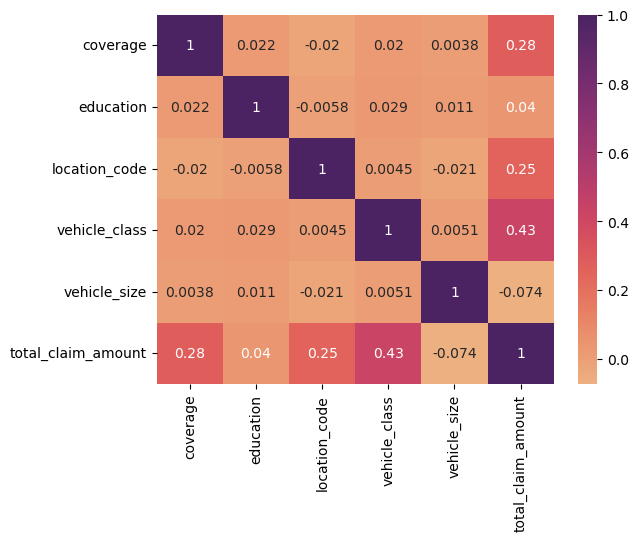

In [45]:
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

vehicle_class has the highest correlation to total_claim_amout, so i will consider this column for the the X/y Split and the testing.

Now i will check the nominal columns for correlations.

Nominal: state, response, employmentstatus, gender, marital_status, policy_type, policy, renew_offer_type, sales_channel

In [46]:
nominal = data[['state', 'response', 'employmentstatus', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel']]
nominal.head()

,state,response,employmentstatus,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel
0,Washington,No,Employed,F,Married,Corporate Auto,Corporate L3,Offer1,Agent
1,Arizona,No,Unemployed,F,Single,Personal Auto,Personal L3,Offer3,Agent
2,Nevada,No,Employed,F,Married,Personal Auto,Personal L3,Offer1,Agent
3,California,No,Unemployed,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center
4,Washington,No,Employed,M,Single,Personal Auto,Personal L1,Offer1,Agent


First I have to use a One Hot Encoder to transform the categorical into a numerical column.

In [47]:
from sklearn.preprocessing import OneHotEncoder

#categories_values = [list_of_possible_values_for_col1, list_of_possible_values_for_col2, list_of_possible_values_for_col3 ]
#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
#encoder = OneHotEncoder(drop='first', categories=categories_values)
encoder = OneHotEncoder()
encoder.fit(nominal)

nominal_np = encoder.transform(nominal).toarray()

nominal_ohe = pd.DataFrame(nominal_np, columns=encoder.get_feature_names_out(), 
                           index=nominal.index)

display(nominal_ohe.head())

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


I will check the heatmap for every nominal column. But I'm not sure if the method is the right one to find out the corrolation for nominal columns.

In [48]:
nominal_ohe=pd.concat([nominal_ohe, data['total_claim_amount']],axis=1)
nominal_ohe.columns

Index(['state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon',
       'state_Washington', 'response_No', 'response_Yes',
       'employmentstatus_Disabled', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L1', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'policy_Special L2', 'policy_Special L3',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Agent', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web', 'total_claim_amount'],
      dty

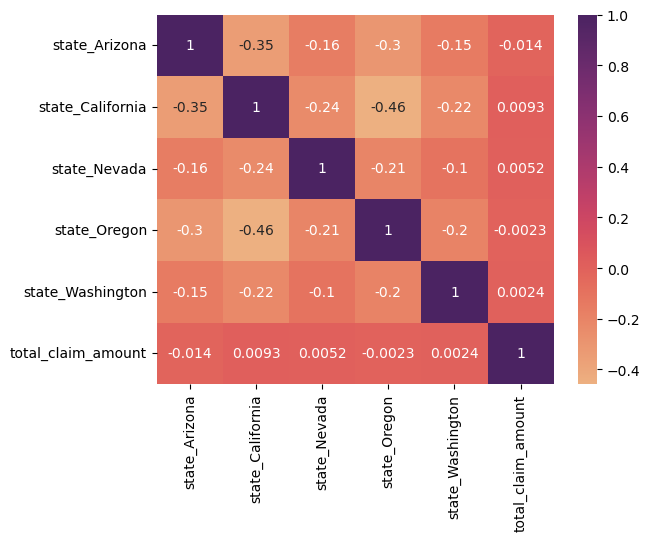

In [49]:
correlations_matrix = nominal_ohe[['state_Arizona', 'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

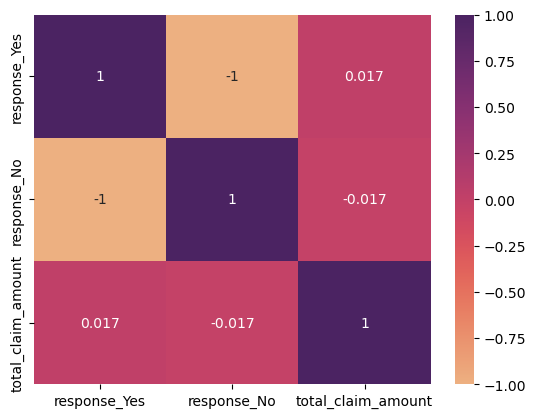

In [50]:
correlations_matrix = nominal_ohe[['response_Yes','response_No', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

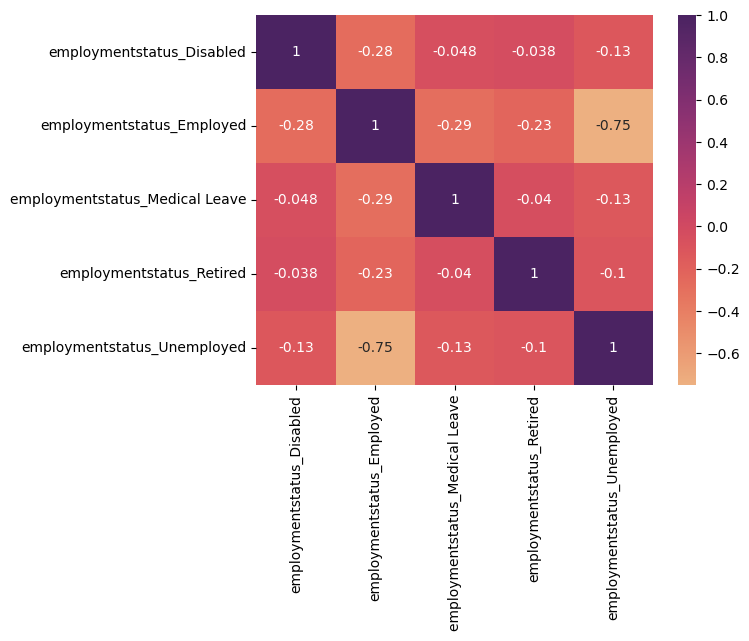

In [51]:
correlations_matrix = nominal_ohe[['employmentstatus_Disabled','employmentstatus_Employed','employmentstatus_Medical Leave','employmentstatus_Retired','employmentstatus_Unemployed']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

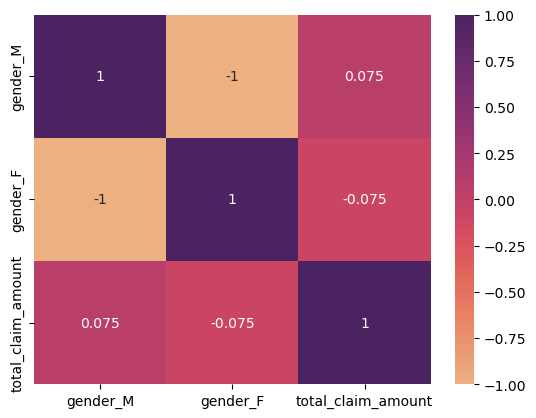

In [52]:
correlations_matrix = nominal_ohe[['gender_M','gender_F', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

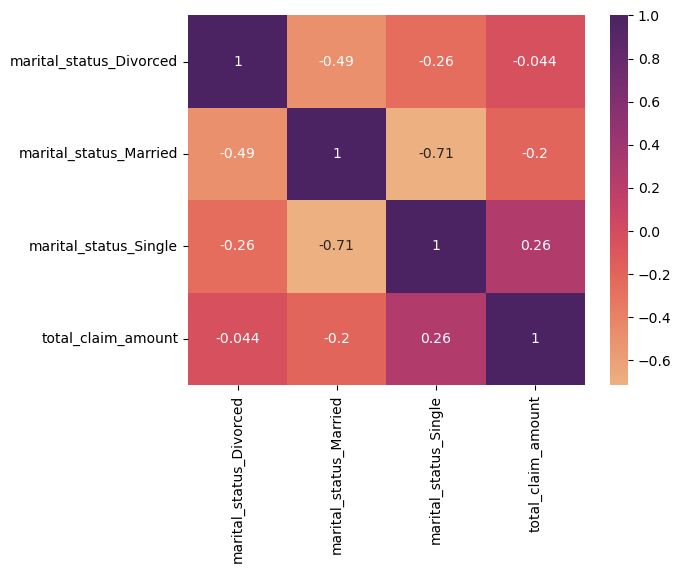

In [53]:
correlations_matrix = nominal_ohe[['marital_status_Divorced', 'marital_status_Married', 'marital_status_Single', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

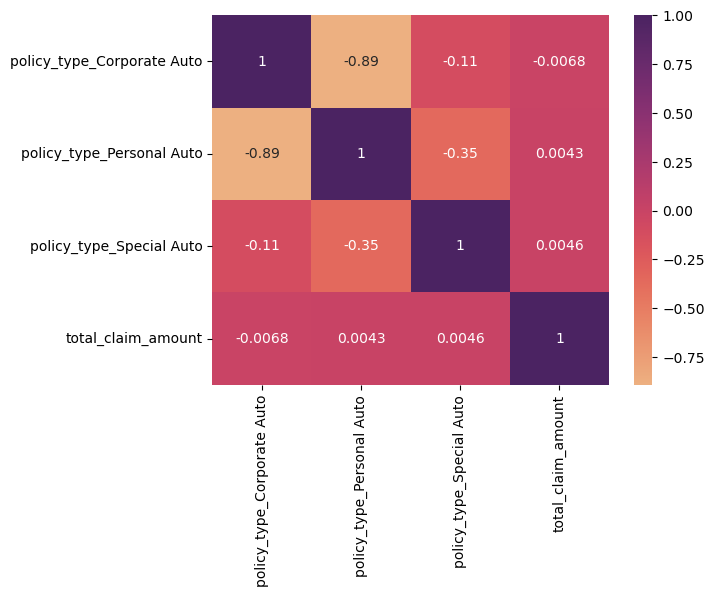

In [54]:
correlations_matrix = nominal_ohe[['policy_type_Corporate Auto', 'policy_type_Personal Auto', 'policy_type_Special Auto', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

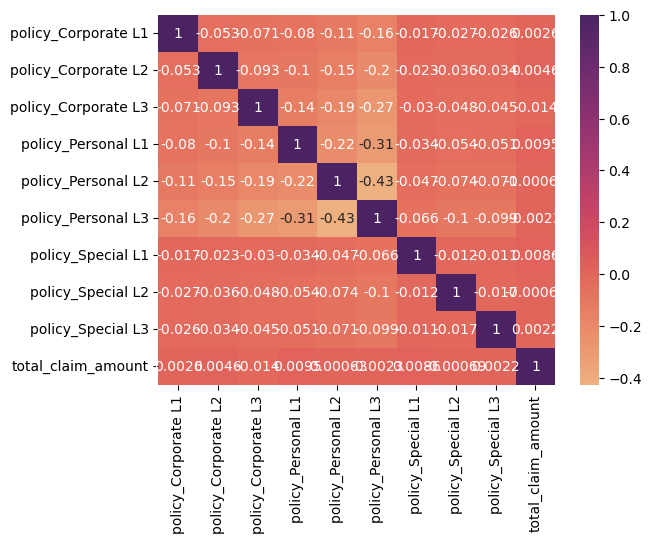

In [55]:
correlations_matrix = nominal_ohe[['policy_Corporate L1', 'policy_Corporate L2', 'policy_Corporate L3','policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3','policy_Special L1', 'policy_Special L2', 'policy_Special L3', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

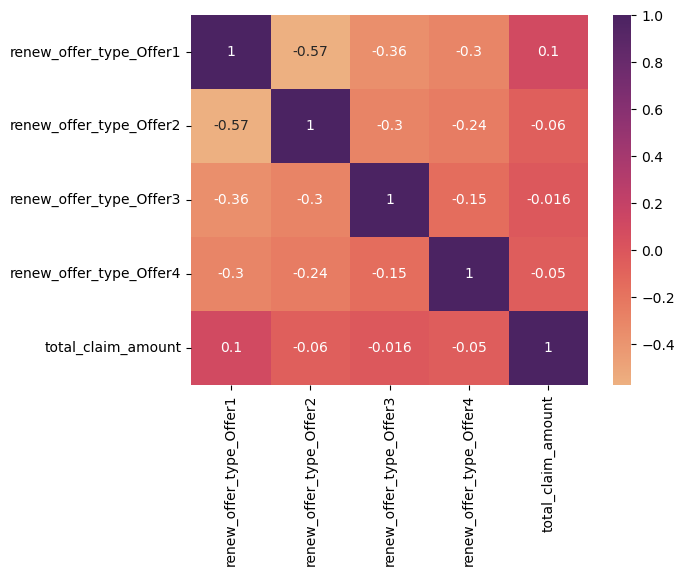

In [56]:
correlations_matrix = nominal_ohe[['renew_offer_type_Offer1', 'renew_offer_type_Offer2','renew_offer_type_Offer3', 'renew_offer_type_Offer4', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

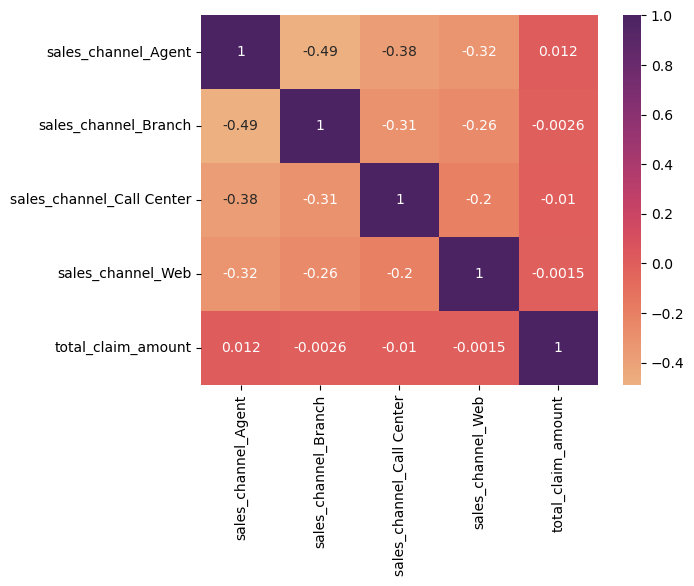

In [57]:
correlations_matrix = nominal_ohe[['sales_channel_Agent', 'sales_channel_Branch','sales_channel_Call Center', 'sales_channel_Web', 'total_claim_amount']].corr()
cmap = sns.color_palette('flare', as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [58]:
def select_features_for_linear_models_based_on_correlation(df: pd.DataFrame, y: str, threshold=0.75) -> list:
    '''
    This function picks a DataFrame and a `y` column computes the correlation matrix between all the numerical
    columns. Then it returns a Python list with the columns that have a abs(corr(x,y)) >= 0.75

    Inputs:
    df: Pandas DataFrame
    y: string with the column to be considered `y`

    Outputs:
    list of columns highñy correlated with the `y` column
    '''

    df2 = df.copy()
    df2 = df2.select_dtypes([float,int])
    
    correlation_matrix = df2.corr()
    correlation_matrix.drop(y,axis=0, inplace=True)
    
    selected_columns = correlation_matrix[y]

    list_of_selected_columns = correlation_matrix[abs(selected_columns) >= threshold].index.tolist()
    

    return list_of_selected_columns

In [59]:
select_features_for_linear_models_based_on_correlation(nominal_ohe, 'total_claim_amount', threshold=0.2)

['employmentstatus_Employed',
 'employmentstatus_Unemployed',
 'marital_status_Married',
 'marital_status_Single']

Generally the correlations are very low, but i will take the employment_status and the marital_status as nominal categorical columns into the training set. So i set up my DataFrame for the model with the following columns. 

In [60]:
model_data = data[['monthly_premium_auto','vehicle_class','employmentstatus','marital_status','total_claim_amount']]
model_data.head()

,monthly_premium_auto,vehicle_class,employmentstatus,marital_status,total_claim_amount
0,69,Two-Door Car,Employed,Married,384.811147
1,94,Four-Door Car,Unemployed,Single,1131.464935
2,108,Two-Door Car,Employed,Married,566.472247
3,106,SUV,Unemployed,Married,529.881344
4,73,Four-Door Car,Employed,Single,138.130879


### Remove outliers

For the numerical columns, there are a decend amount of values wich are outside the whiskers. As we did it in the lecture, I will drop them by computing the iqr. But I will mention that they are representing a group which has simply not enogh data. 

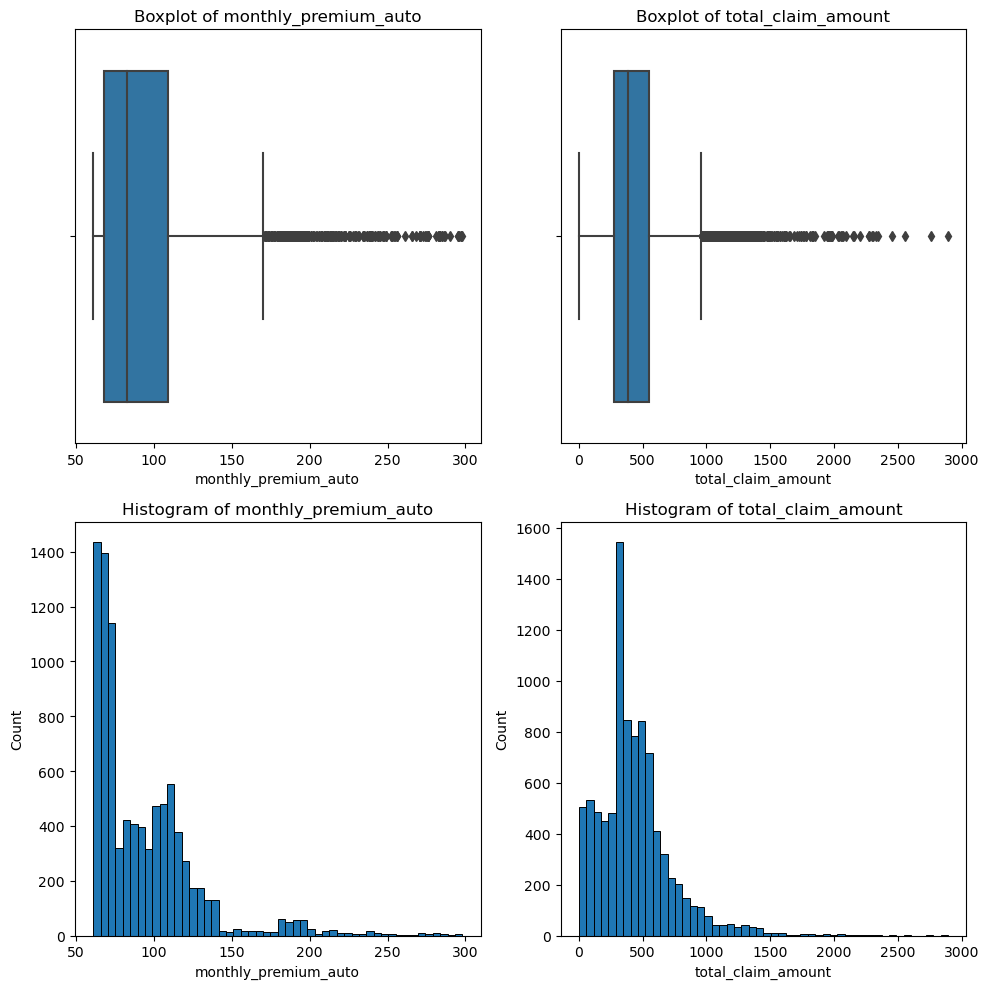

Skew of monthly_premium_auto : 2.1235464499475345
Skew of total_claim_amount: 1.7149658097209557


In [61]:
fig, ax = plt.subplots(2,2,figsize=(10,10), dpi=100)
sns.boxplot(x=model_data['monthly_premium_auto'], ax=ax[0,0])
ax[0,0].set_title("Boxplot of monthly_premium_auto")
ax[1,0].hist(x=model_data['monthly_premium_auto'], bins=50, linewidth=0.7, edgecolor='black')
ax[1,0].set_title("Histogram of monthly_premium_auto")
ax[1,0].set_ylabel('Count')
ax[1,0].set_xlabel('monthly_premium_auto')

sns.boxplot(x=model_data['total_claim_amount'], ax=ax[0,1])
ax[0,1].set_title("Boxplot of total_claim_amount")
ax[1,1].hist(x=model_data['total_claim_amount'], bins=50, linewidth=0.7, edgecolor='black')
ax[1,1].set_title("Histogram of total_claim_amount")
ax[1,1].set_ylabel('Count')
ax[1,1].set_xlabel('total_claim_amount')

plt.tight_layout()
plt.show()
print('Skew of monthly_premium_auto :',model_data['monthly_premium_auto'].skew())
print('Skew of total_claim_amount:',model_data['total_claim_amount'].skew())

In [62]:
def remove_ouliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    '''
    removes the outliers from a selected column who are outsite from the upper and lower wisker 
    computed by the 0.25 and 0.75 percentile
    '''
    iqr = np.percentile(df[col],75) - np.percentile(df[col],25)
    upper_wisker = np.percentile(df[col],75) + 1.5*iqr
    lower_wisker = np.percentile(df[col],25) - 1.5*iqr
    df = df[(df[col]>lower_wisker) & (df[col]<upper_wisker)]
    
    return df

In [63]:
model_data = remove_ouliers(model_data,'monthly_premium_auto')
model_data = remove_ouliers(model_data,'total_claim_amount')

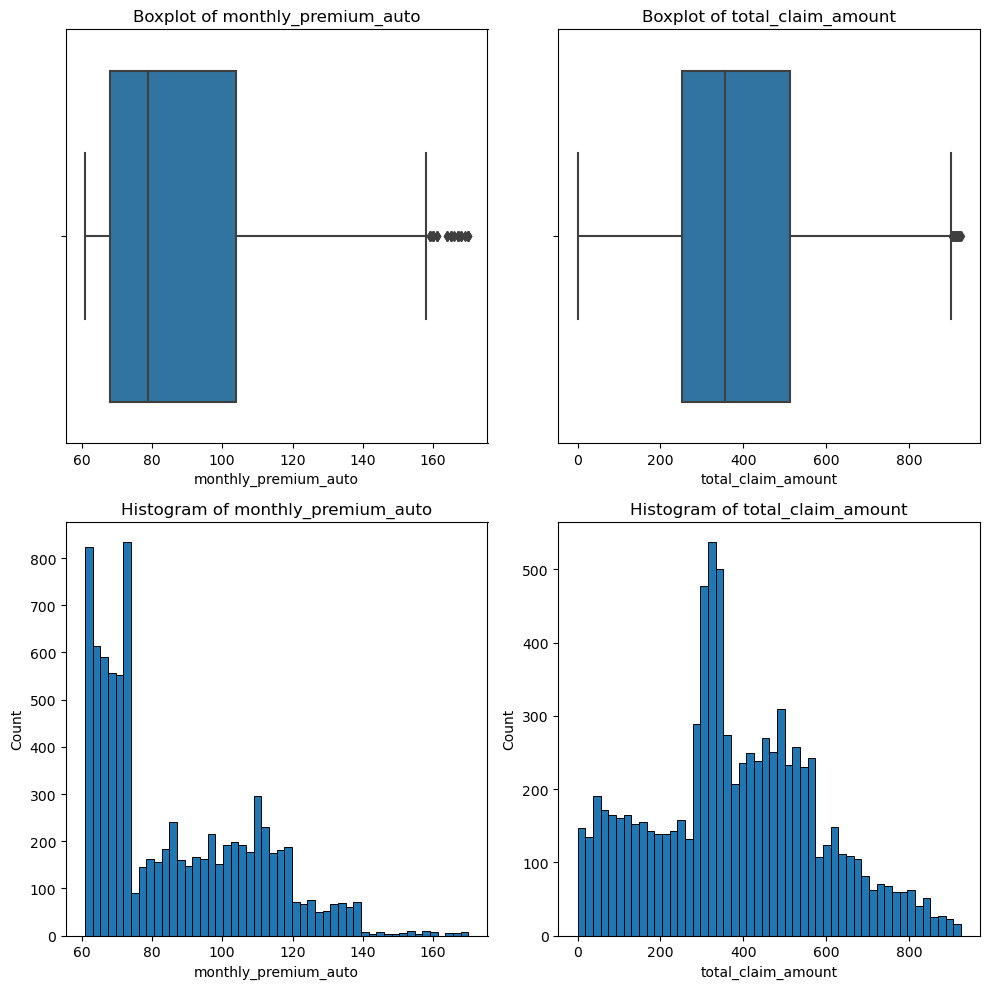

Skew of monthly_premium_auto : 0.7822366916370288
Skew of total_claim_amount: 0.2054693269629417


In [64]:
fig, ax = plt.subplots(2,2,figsize=(10,10), dpi=100)
sns.boxplot(x=model_data['monthly_premium_auto'], ax=ax[0,0])
ax[0,0].set_title("Boxplot of monthly_premium_auto")
ax[1,0].hist(x=model_data['monthly_premium_auto'], bins=50, linewidth=0.7, edgecolor='black')
ax[1,0].set_title("Histogram of monthly_premium_auto")
ax[1,0].set_ylabel('Count')
ax[1,0].set_xlabel('monthly_premium_auto')

sns.boxplot(x=model_data['total_claim_amount'], ax=ax[0,1])
ax[0,1].set_title("Boxplot of total_claim_amount")
ax[1,1].hist(x=model_data['total_claim_amount'], bins=50, linewidth=0.7, edgecolor='black')
ax[1,1].set_title("Histogram of total_claim_amount")
ax[1,1].set_ylabel('Count')
ax[1,1].set_xlabel('total_claim_amount')

plt.tight_layout()
plt.show()
print('Skew of monthly_premium_auto :',model_data['monthly_premium_auto'].skew())
print('Skew of total_claim_amount:',model_data['total_claim_amount'].skew())

By dopping the Outlieres, the skew of each numerical column was reduced by:

monthly_premium_auto: 2,21 --> 0,78

total_claim_amount: 1,71 --> 0,20

### X-y split. (define which column you want to predict, and which ones you will use to make the prediction)

y = total claim amount    --> column to predict

X = monthly premium auto, vehicle_class, employmentstatus, marital_status  --> column to make the prediction

In [65]:
model_data.head()

,monthly_premium_auto,vehicle_class,employmentstatus,marital_status,total_claim_amount
0,69,Two-Door Car,Employed,Married,384.811147
2,108,Two-Door Car,Employed,Married,566.472247
3,106,SUV,Unemployed,Married,529.881344
4,73,Four-Door Car,Employed,Single,138.130879
5,69,Two-Door Car,Employed,Married,159.383042


In [66]:
y = model_data[['total_claim_amount']]
X = model_data.drop(['total_claim_amount'], axis=1)

### Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any integer number of your choice).

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained in the previous step (make sure to use the columns= option to set the columns names to X.columns).

In [68]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

### Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().

In [69]:
X_train_df_num = X_train_df.select_dtypes(np.number)
X_train_df_cat = X_train_df.select_dtypes(object)
X_test_df_num = X_test_df.select_dtypes(np.number)
X_test_df_cat = X_test_df.select_dtypes(object)

### If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .fit() only in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()

#### If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays generated by the train_test_split() function.

In [70]:
import pickle
import os
from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import StandardScaler

# Transforming data
transformer = PowerTransformer(standardize=True)
transformer.fit(X_train_df_num) # we will reuse this transformer for X_test later

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "powertransformer_x_num.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

X_train_transformed = transformer.transform(X_train_df_num)
X_test_transformed  = transformer.transform(X_test_df_num)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_df_num.columns, index=X_train_df_num.index)
X_test_transformed_df  = pd.DataFrame(X_test_transformed,  columns=X_test_df_num.columns, index=X_test_df_num.index)
display(X_train_transformed_df.describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
monthly_premium_auto,6755.0,-0.0,1.0,-1.52,-0.87,-0.11,0.95,2.12


## Transform the categorical columns into numbers using a:

### OneHotEncoder for categorical nominal columns. (again only use the .fit() in the Train set, but the .transform() in the Train and the Test sets)

In [71]:
X_train_df_cat_nom = X_train_df_cat[['employmentstatus', 'marital_status']]
X_test_df_cat_nom = X_test_df_cat[['employmentstatus', 'marital_status']]
#display(X_train_df_cat_nom.head())
#display(X_test_df_cat_nom.head())

In [72]:
from sklearn.preprocessing import OneHotEncoder

#categories_values = [list_of_possible_values_for_col1, list_of_possible_values_for_col2, list_of_possible_values_for_col3 ]
#categories_values = [list(data[col].unique()) for col in X_train_categorical.columns]
#encoder = OneHotEncoder(drop='first', categories=categories_values)
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_df_cat_nom)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "onehotencoder_cat_nom.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

X_train_df_cat_nom_np = encoder.transform(X_train_df_cat_nom).toarray()
X_test_df_cat_nom_np = encoder.transform(X_test_df_cat_nom).toarray()

X_train_df_cat_nom_ohe = pd.DataFrame(X_train_df_cat_nom_np, columns=encoder.get_feature_names_out(), index=X_train_df_cat_nom.index)
X_test_df_cat_nom_ohe = pd.DataFrame(X_test_df_cat_nom_np, columns=encoder.get_feature_names_out(), index=X_test_df_cat_nom.index)

display(X_train_df_cat_nom_ohe.head())

,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single
1623,1.0,0.0,0.0,0.0,0.0,1.0
3021,1.0,0.0,0.0,0.0,1.0,0.0
3788,1.0,0.0,0.0,0.0,1.0,0.0
4400,1.0,0.0,0.0,0.0,0.0,0.0
902,1.0,0.0,0.0,0.0,1.0,0.0


### Use .replace() to cast into numbers any categorical ordinal column replacing each label with a number that: respects the order of the labels and the relative "distance"

In [73]:
X_train_df_cat_ord = X_train_df_cat[['vehicle_class']]
X_test_df_cat_ord = X_test_df_cat[['vehicle_class']]
display(X_train_df_cat_ord.head())

,vehicle_class
1623,Two-Door Car
3021,SUV
3788,Four-Door Car
4400,Four-Door Car
902,Sports Car


In [74]:
def rename_ordinal(df:pd.DataFrame, col:str, ordinal_dict:dict) -> pd.DataFrame:
    '''
    ranaming a ordinal column with the values from an input dictionary
    '''
    df[col] = df[col].replace(ordinal_dict)
    return

In [75]:
#vehicle_class ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car']
rename_ordinal(X_train_df_cat_ord,'vehicle_class',{"Two-Door Car": "1", "Four-Door Car": "2", "SUV": "3", "Luxury SUV": "4", "Sports Car": "5", "Luxury Car": "5"})
rename_ordinal(X_test_df_cat_ord,'vehicle_class',{"Two-Door Car": "1", "Four-Door Car": "2", "SUV": "3", "Luxury SUV": "4", "Sports Car": "5", "Luxury Car": "5"})

C:\Users\schue\AppData\Local\Temp\ipykernel_15756\2843734578.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(ordinal_dict)


In [76]:
display(X_train_df_cat_ord.head())

,vehicle_class
1623,1
3021,3
3788,2
4400,2
902,5


### Concat numerical_transformer and categorical_transfomed DataFrames using pd.concat().

In [77]:
X_train_transform = pd.concat([X_train_transformed_df,X_train_df_cat_ord,X_train_df_cat_nom_ohe],axis = 1)
X_test_transform = pd.concat([X_test_transformed_df,X_test_df_cat_ord,X_test_df_cat_nom_ohe],axis = 1)
display(X_train_transform.head())

,monthly_premium_auto,vehicle_class,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,marital_status_Married,marital_status_Single
1623,-1.224863,1,1.0,0.0,0.0,0.0,0.0,1.0
3021,1.099067,3,1.0,0.0,0.0,0.0,1.0,0.0
3788,0.717110,2,1.0,0.0,0.0,0.0,1.0,0.0
4400,-1.224863,2,1.0,0.0,0.0,0.0,0.0,0.0
902,1.395351,5,1.0,0.0,0.0,0.0,1.0,0.0


### Apply another MinMaxScaler to the concatenated DataFrame.

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_transform)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "minmaxscaler_x.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)


X_train_scaled = scaler.transform(X_train_transform)
X_test_scaled  = scaler.transform(X_test_transform)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_transform.columns, index=X_train_transform.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_test_transform.columns, index=X_test_transform.index)
X_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_premium_auto,6755.0,0.417777,0.274247,0.0,0.178343,0.386974,0.678896,1.0
vehicle_class,6755.0,0.279645,0.230992,0.0,0.250000,0.250000,0.250000,1.0
employmentstatus_Employed,6755.0,0.643671,0.478949,0.0,0.000000,1.000000,1.000000,1.0
employmentstatus_Medical Leave,6755.0,0.048409,0.214644,0.0,0.000000,0.000000,0.000000,1.0
employmentstatus_Retired,6755.0,0.030792,0.172767,0.0,0.000000,0.000000,0.000000,1.0
employmentstatus_Unemployed,6755.0,0.232865,0.422688,0.0,0.000000,0.000000,0.000000,1.0
marital_status_Married,6755.0,0.594819,0.490963,0.0,0.000000,1.000000,1.000000,1.0
marital_status_Single,6755.0,0.252406,0.434425,0.0,0.000000,0.000000,1.000000,1.0


I do the same transformation and scaling with the y DataFrame

In [79]:
y_train_df = pd.DataFrame(y_train, columns = y.columns)
y_test_df = pd.DataFrame(y_test, columns = y.columns)
#display(y_train_df.head())
#display(y_test_df.head())

In [80]:
import pickle
import os
from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import StandardScaler

# Transforming data
transformer = PowerTransformer(standardize=True)
transformer.fit(y_train_df) # we will reuse this transformer for X_test later

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "powertransformer_y.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

y_train_transformed = transformer.transform(y_train_df)
y_test_transformed  = transformer.transform(y_test_df)
y_train_transformed_df = pd.DataFrame(y_train_transformed, columns=y_train_df.columns, index=y_train_df.index)
y_test_transformed_df  = pd.DataFrame(y_test_transformed,  columns=y_test_df.columns, index=y_test_df.index)
y_train_transformed_df.head()


,total_claim_amount
1623,-0.673911
3021,-1.036251
3788,0.892687
4400,-1.456121
902,-2.010482


In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(y_train_transformed_df)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "minmaxscaler_y.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(scaler, file)


y_train_scaled = scaler.transform(y_train_transformed_df)
y_test_scaled  = scaler.transform(y_test_transformed_df)
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=y_train_df.columns, index=y_train_df.index)
y_test_scaled_df  = pd.DataFrame(y_test_scaled,  columns=y_test_df.columns, index=y_test_df.index)
y_train_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_claim_amount,6755.0,0.494531,0.212836,0.0,0.374529,0.486344,0.640832,1.0


### Apply linear regression to the Pandas DataFrame obtained in the previous step using sklearn

In [82]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train_scaled_df) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "transformers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")
filename = "linear_model.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension

with open(path+filename, "wb") as file:
    pickle.dump(linear_model, file)



In [83]:
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred  = linear_model.predict(X_test_scaled_df)

In [84]:
y_train_pred = pd.DataFrame(y_train_pred, columns=y_train.columns, index=y_train.index)
y_test_pred  = pd.DataFrame(y_test_pred,  columns=y_test.columns, index=y_test.index)

In [85]:
results = {"Set": ["Train"]*X_train.shape[0] + ["Test"]*X_test.shape[0], 
           "Real": list(y_train_scaled_df['total_claim_amount']) + list(y_test_scaled_df['total_claim_amount']),
           "Predicted": list(y_train_pred['total_claim_amount']) + list(y_test_pred['total_claim_amount'])}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,0.351109,0.377904
1,Train,0.273996,0.522384
2,Train,0.684512,0.485860
3,Train,0.184639,0.322965
4,Train,0.066660,0.555134


In [86]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,0.351109,0.377904,-0.026795
1,Train,0.273996,0.522384,-0.248388
2,Train,0.684512,0.485860,0.198652
3,Train,0.184639,0.322965,-0.138326
4,Train,0.066660,0.555134,-0.488474


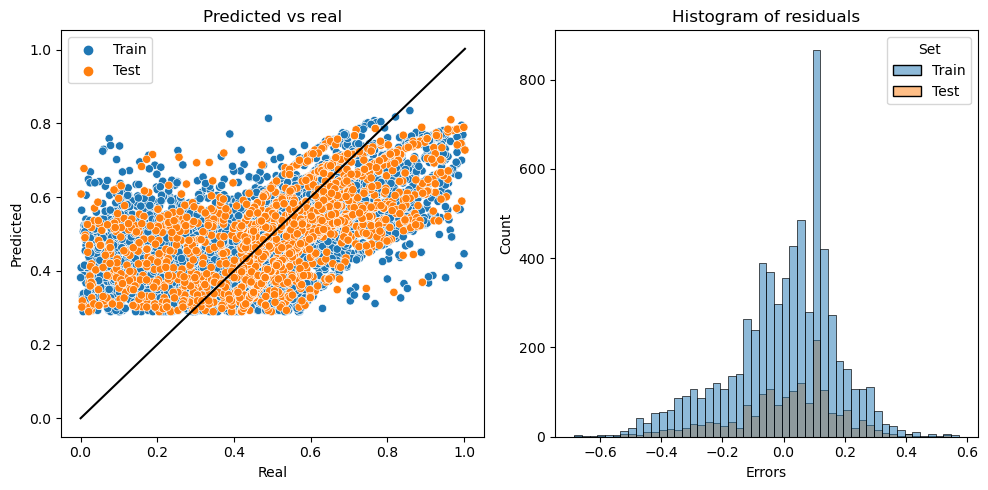

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

# Model Validation

### Compute the following metrics for your Train and Test sets: R2, MSE, RMSE, MAE

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean absolute error
MAE_train = mean_absolute_error(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
MAE_test  = mean_absolute_error(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

# Mean squared error
MSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
MSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

# Root mean squared error
RMSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], 
                                results_df[results_df["Set"]=="Train"]["Predicted"],
                                squared=False)
RMSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  
                                results_df[results_df["Set"]=="Test"]["Predicted"],
                                squared=False)

# R2
R2_train = r2_score(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
R2_test  = r2_score(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])


In [89]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Function: Calculate the various error metrics for a given set of train and test data prediciton splits and organaises them DataFrame 
    Input 
    Outtput Dataframe with metrics column and erors sploit by test and training data type
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test,  y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test,  y_pred_test)
  
    
    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test,  y_pred_test)

    results = {"Metric":['MAE','MSE','RMSE','R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

### Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.

In [90]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,0.14,0.14
1,MSE,0.03,0.03
2,RMSE,0.18,0.18
3,R2,0.32,0.33


The R2 is quite low. But this was predictable beacause of the low correlations between the columns i took into the testing.

The R2 between the trainset and the testset are almost eqaual, therefore I can say, that the model is not suffer from overfitting.